In [73]:
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

Task 1

In [74]:
def lamb1(t):
   return np.sin(t) + 1

In [75]:
def lamb2(t):
    if t < 50:
        return 0.5
    else:
        return 5
    
lamb2 = np.vectorize(lamb2)

In [76]:
def inhomogoneus_poisson(lamb, T):
    n=[0] 
    s0= 0
    t = [0]
    board = np.linspace(0, T, 100)
    sup = max(lamb(i) for i in board)
    while s0 < T:
        u = np.random.uniform(0,1)
        w = - np.log(u)/sup
        s0 = s0 + w
        d = np.random.uniform(0,1)
        if d < lamb(s0)/sup:
            t.append(s0)
            n.append(1)
    if t[-1] < T:
        return t, np.cumsum(n)
    else:
        return t[:-1], np.cumsum(n[:-1])

In [77]:
T = 40

In [79]:
in_poiss = inhomogoneus_poisson(lamb1, T)

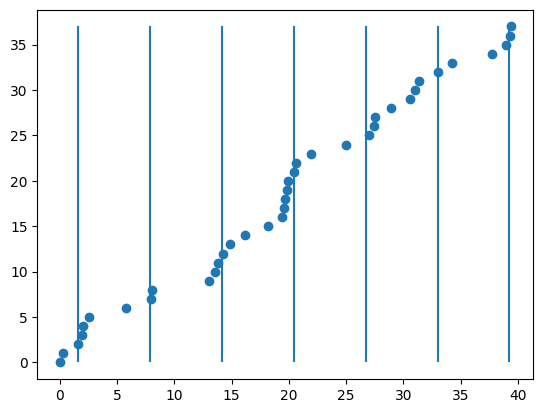

In [80]:
plt.scatter(in_poiss[0], in_poiss[1])
plt.vlines(np.arange(np.pi/2,T,2*np.pi), 0, max(in_poiss[1]))

In [81]:
T = 60
poiss_lamb2 = inhomogoneus_poisson(lamb2, T)

Text(0.5, 0, 't')

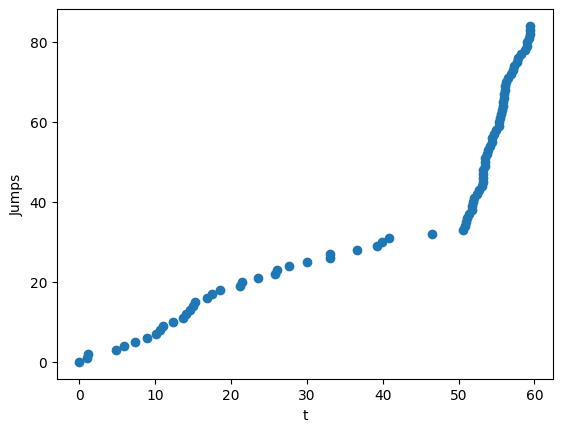

In [89]:
plt.scatter(poiss_lamb2[0], poiss_lamb2[1])
plt.ylabel("Jumps")
plt.xlabel("t")

In [83]:
def number_of_jumps(lamb, t):
    N = inhomogoneus_poisson(lamb, t)
    N = N[1][-1]
    return N

In [84]:
def integrate_lamb(T, lamb, dt=0.001):
    ts = np.arange(0, T, dt)
    lambs = lamb(ts)
    return sum(lambs*dt)

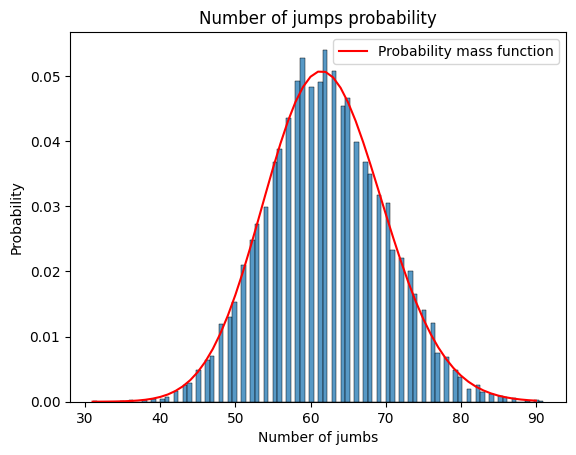

In [87]:
lamb = lamb1

M = 10000
jumps = np.zeros(M)
for i in range(M):
    jumps[i] = number_of_jumps(lamb, T)
# jumps = sorted(jumps)

# plt.hist(jumps, bins=60, density=True);
sns.histplot(jumps,  stat="probability", bins=100)
ns = np.arange(min(jumps), max(jumps))

int_lamb = integrate_lamb(T, lamb)

def teoretical_poisson_pmf(n, lamb):
    return ((lamb)**n*np.exp(-lamb)) / math.factorial(int(n))


plt.plot(ns, [teoretical_poisson_pmf(n, int_lamb) for n in ns], 'r', label = 'Probability mass function')
plt.xlabel("Number of jumbs")
plt.title("Number of jumps probability")
plt.legend()